In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('/content/train.csv', usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(714, 3)

In [8]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [10]:
clf = DecisionTreeClassifier()


In [11]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [12]:
accuracy_score(y_test,y_pred)

0.6363636363636364

In [13]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6317097026604068)

In [14]:
kbin_age = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')

In [15]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [16]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [17]:
trf.named_transformers_['first'].n_bins_

array([5])

In [18]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.8958,  13.    ,  26.    ,  51.4792, 512.3292])],
      dtype=object)

In [19]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'afe_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [20]:
output['age_labels'] = pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [21]:
output.sample(5)

,age,afe_trf,fare,fare_trf,age_labels,fare_labels
569,32.0,3.0,7.8542,0.0,"(25.0, 32.0]","(0.0, 7.896]"
698,49.0,4.0,110.8833,4.0,"(42.0, 80.0]","(51.479, 512.329]"
272,41.0,3.0,19.5000,2.0,"(32.0, 42.0]","(13.0, 26.0]"
562,28.0,2.0,13.5000,2.0,"(25.0, 32.0]","(13.0, 26.0]"
801,31.0,2.0,26.2500,3.0,"(25.0, 32.0]","(26.0, 51.479]"


In [22]:
 clf = DecisionTreeClassifier()
 clf.fit(x_train_trf,y_train)
 y_pred2 = clf.predict(x_test_trf)

In [23]:
accuracy_score(y_test,y_pred2)

0.6433566433566433

In [24]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6247261345852895)

In [34]:
def discretize(bins,strategy):
  kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

  trf = ColumnTransformer([
      ('first',kbin_age,[0]),
      ('second',kbin_fare,[1])
  ])

  x_trf = trf.fit_transform(x)
  print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))

  plt.figure(figsize=(14,8))
  plt.subplot(221)
  plt.hist(x['Age'])
  plt.title("Age Before Discretization")

  plt.subplot(222)
  plt.hist(x_trf[:,0],color='red')
  plt.title("Age After Discretization")

  plt.subplot(223)
  plt.hist(x['Fare'])
  plt.title("Fare Before Discretization")

  plt.subplot(224)
  plt.hist(x_trf[:,1],color='red')
  plt.title("Fare After Discretization")

  plt.tight_layout()
  plt.show()

0.630281690140845


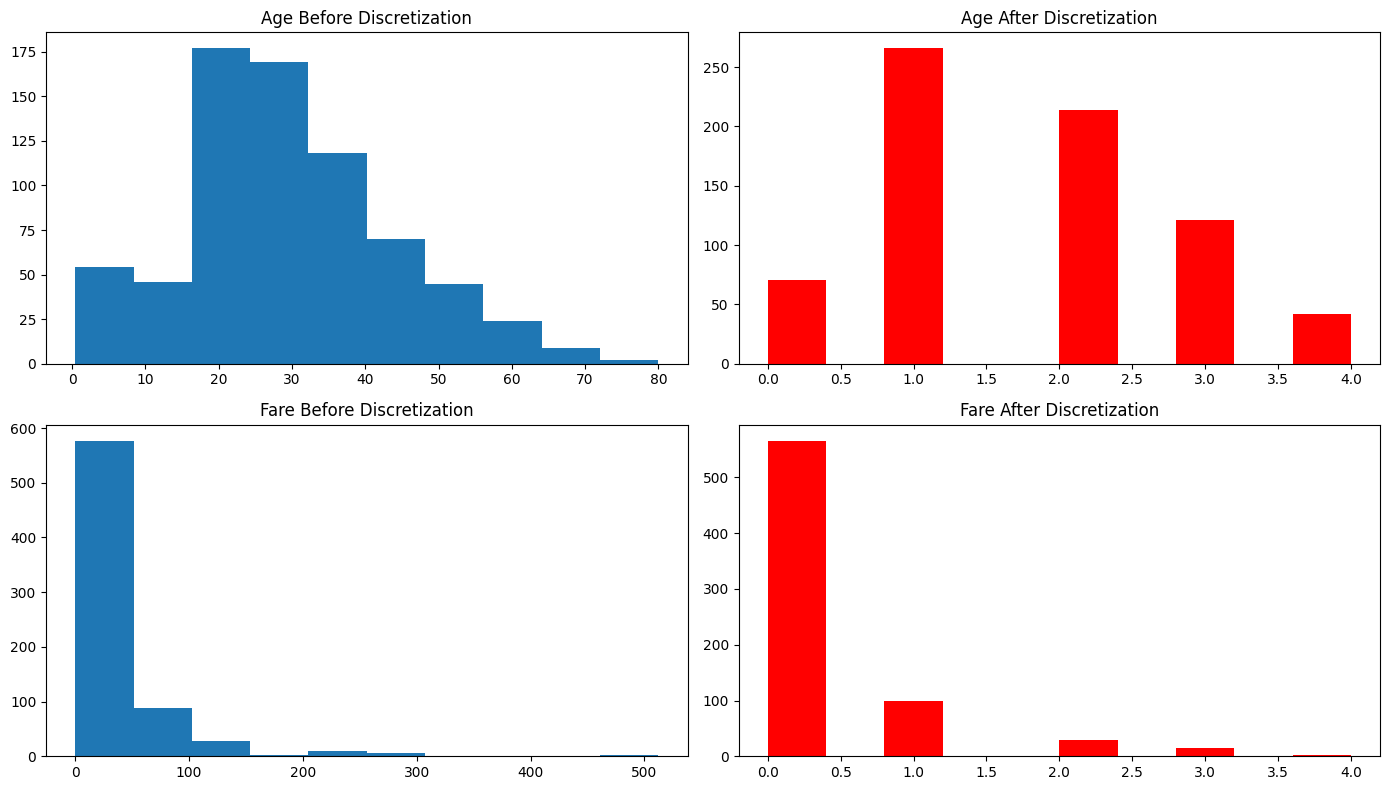

In [35]:
discretize(5,strategy='kmeans')